Credit cs231n.stanford.edu

## Base Functions 
The `forward` function will receive inputs, weights, and other parameters and will return both an output and a `cache` object storing data needed for the backward pass, like this:

```python
def layer_forward(x, w):
  """ Receive inputs x and weights w """
  # Do some computations ...
  z = # ... some intermediate value
  # Do some more computations ...
  out = # the output
   
  cache = (x, w, z, out) # Values we need to compute gradients
   
  return out, cache
```

The backward pass will receive upstream derivatives and the `cache` object, and will return gradients with respect to the inputs and weights, like this:

```python
def layer_backward(dout, cache):
  """
  Receive derivative of loss with respect to outputs and cache,
  and compute derivative with respect to inputs.
  """
  # Unpack cache values
  x, w, z, out = cache
  
  # Use values in cache to compute derivatives
  dx = # Derivative of loss with respect to x
  dw = # Derivative of loss with respect to w
  
  return dx, dw
```

<h2 align="center">BackProp and Optimizers</h2>
<img src="img/bp.png" width="600">

In [2]:
import numpy as np
from scipy.optimize import check_grad
from gradient_check import eval_numerical_gradient_array

def rel_error(x, y):
      return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

<h3>Grad Check</h3>

<img src="img/gc.png" width="600">

<h3>Softmax Loss Layer</h3>
<img src="./img/loss.png" width="300">
<img src="./img/log.png" width="600">

In [3]:
from past.builtins import xrange 
def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth class
    for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
    0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    loss = 0
    d = x - np.max(x, axis=1, keepdims=True)
    softmax = np.exp(d)/np.sum(np.exp(d), axis=1, keepdims=True)
    loss = -np.sum(np.log(softmax[xrange(x.shape[0]), y]))/x.shape[0]
    scores = np.copy(x)
    scores[xrange(scores.shape[0]), y] = 1
    scores[np.where(scores!=1)] = 0
    #print(x)
    #print(scores)
    #print(x[xrange(x.shape[0]), y])
    softmax = softmax-scores
    #softmax = -x
    #softmax[xrange(softmax.shape[0]),y[np.newaxis,:]] +=1
    #pint(softmax)
    #d[xrange(softmax.shape[0]), y] = 1
    #d[np.where(d!=1)] = 0
    #d -= softmax
    #d = -d
    return loss, softmax/x.shape[0]

In [4]:
y = np.random.randint(0, 3, 10)
dx = lambda x: softmax_loss(x.reshape((10, 3)), y)[1].reshape(-1)
loss = lambda x: softmax_loss(x.reshape((10, 3)), y)[0]

In [5]:
print('loss is a scalar\n', loss(np.random.random((10, 3))))

loss is a scalar
 1.34538942759


In [6]:
print('gradient is a matrix with shape 10x3\n', dx(np.random.random((10, 3))))

gradient is a matrix with shape 10x3
 [ 0.03957672 -0.07454262  0.0349659  -0.07725346  0.02959367  0.0476598
  0.02920757  0.03434955 -0.06355712  0.04624621 -0.06819754  0.02195133
  0.02379353 -0.06371713  0.03992359  0.04463807 -0.07200298  0.02736492
 -0.06579632  0.03876053  0.02703579  0.02197117  0.05266605 -0.07463723
 -0.06196307  0.03896391  0.02299916  0.0287646   0.02470405 -0.05346865]


In [7]:
print('difference should be ~10e-8', check_grad(loss, dx, np.random.random((10, 3)).reshape(-1)))

difference should be ~10e-8 6.7662845062e-08


<h3>Dense Layer</h3>
<img src="img/lin.png" width="300">

In [8]:
def affine_forward(x, w, b):
    """
    Computes the forward pass for an affine (fully-connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.

    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    out = None
    #############################################################################
    # TODO: Implement the affine forward pass. Store the result in out. You     #
    # will need to reshape the input into rows.                                 #
    #############################################################################
    out = np.dot(x.reshape(x.shape[0], -1), w) + b
    ##########################.###################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    cache = (x, w, b)
    return out, cache

In [9]:
# Test the affine_forward function

num_inputs = 2
input_shape = (4, 5, 6)
output_dim = 3

input_size = num_inputs * np.prod(input_shape)
weight_size = output_dim * np.prod(input_shape)

x = np.linspace(-0.1, 0.5, num=input_size).reshape(num_inputs, *input_shape)
w = np.linspace(-0.2, 0.3, num=weight_size).reshape(np.prod(input_shape), output_dim)
b = np.linspace(-0.3, 0.1, num=output_dim)

out, _ = affine_forward(x, w, b)
correct_out = np.array([[ 1.49834967,  1.70660132,  1.91485297],
                        [ 3.25553199,  3.5141327,   3.77273342]])

# Compare your output with ours. The error should be around 1e-9.
print('Testing affine_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing affine_forward function:
difference:  9.76985004799e-10


In [10]:
def affine_backward(dout, cache):
    """
    Computes the backward pass for an affine layer.

    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
    - x: Input data, of shape (N, d_1, ... d_k)
    - w: Weights, of shape (D, M)

    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    dx, dw, db = None, None, None
    #############################################################################
    # TODO: Implement the affine backward pass.                                 #
    #############################################################################
    dx = dout.dot(w.T).reshape(x.shape[0], *x.shape[1:])
    dw = x.reshape(x.shape[0], -1).T.dot(dout).reshape(-1, dout.shape[1])
    db = np.sum(dout, axis=0).reshape(-1)
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return dx, dw, db

In [11]:
# Test the affine_backward function

x = np.random.randn(10, 2, 3)
w = np.random.randn(6, 5)
b = np.random.randn(5)
dout = np.random.randn(10, 5)

dx_num = eval_numerical_gradient_array(lambda x: affine_forward(x, w, b)[0], x, dout)
dw_num = eval_numerical_gradient_array(lambda w: affine_forward(x, w, b)[0], w, dout)
db_num = eval_numerical_gradient_array(lambda b: affine_forward(x, w, b)[0], b, dout)

_, cache = affine_forward(x, w, b)
dx, dw, db = affine_backward(dout, cache)

# The error should be around 1e-10
print('Testing affine_backward function:')
print('dx error: ', rel_error(dx_num, dx))
print('dw error: ', rel_error(dw_num, dw))
print('db error: ', rel_error(db_num, db))

Testing affine_backward function:
dx error:  2.80080621817e-10
dw error:  2.10168894169e-10
db error:  8.49327554214e-12


<h3>ReLu Layer</h3>

$$ReLu(x) = max(0, x)$$

In [12]:
def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    out = None
    #############################################################################
    # TODO: Implement the ReLU forward pass.                                    #
    #############################################################################
    out = np.maximum(0, x)
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    cache = x
    return out, cache

In [13]:
# Test the relu_forward function

x = np.linspace(-0.5, 0.5, num=12).reshape(3, 4)

out, _ = relu_forward(x)
correct_out = np.array([[ 0.,          0.,          0.,          0.,        ],
                        [ 0.,          0.,          0.04545455,  0.13636364,],
                        [ 0.22727273,  0.31818182,  0.40909091,  0.5,       ]])

# Compare your output with ours. The error should be around 1e-8
print('Testing relu_forward function:')
print('difference: ', rel_error(out, correct_out))

Testing relu_forward function:
difference:  4.99999979802e-08


In [14]:
def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    dx, x = None, cache
    #############################################################################
    # TODO: Implement the ReLU backward pass.                                   #
    #############################################################################
    x = np.maximum(0, x)
    x[np.where(x!=0)] = 1
    dx = np.multiply(dout, x)
    #############################################################################
    #                             END OF YOUR CODE                              #
    #############################################################################
    return dx

In [15]:
x = np.random.randn(10, 10)
dout = np.random.randn(*x.shape)

dx_num = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)

_, cache = relu_forward(x)
dx = relu_backward(dout, cache)

# The error should be around 1e-12
print('Testing relu_backward function:')
print('dx error: ', rel_error(dx_num, dx))

Testing relu_backward function:
dx error:  3.27560387141e-12


<h3>Two Layer Fully Connected Neural Net with SGD</h3>

In [16]:
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%pylab inline

X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Populating the interactive namespace from numpy and matplotlib


In [17]:
X = (X-np.mean(X, axis = 0))/(np.var(X, axis=0)+0.0000001)

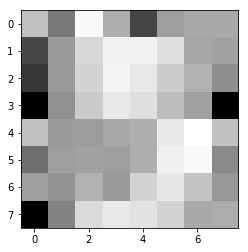

In [18]:
pylab.imshow(X[5].reshape((8, 8)), cmap='gray')

In [21]:
W1, b1 = np.random.random((64, 100)), np.random.random(100)
W2, b2 = np.random.random((100, 10)), np.random.random(10)

lr = 1e-4

for i in range(50000):
    batch_index = np.random.randint(0, X_train.shape[0], 100)
    batch_X, batch_y = X_train[batch_index], y_train[batch_index]
    
    # ------------ Train ----------------- 
    # Forward Pass
    #print(batch_X.shape)
    out1, cache1 = affine_forward(batch_X, W1, b1) # Dense Layer
    out2, cache2 = relu_forward(out1)              # ReLu Layer
    out3, cache3 = affine_forward(out2,    W2, b2) # Dense Layer 
    #print(out1.shape, out2.shape, out3.shape)
    #print(softmax.shape)
    tr_loss, dx = softmax_loss(out3, batch_y)      # Loss Layer 
    
    # Backward Pass
    dx3, dw3, db3 = affine_backward(dx, cache3)
    dx2 = relu_backward(dx3, cache2)
    dx1, dw1, db1 = affine_backward(dx2, cache1)
    
    # Updates
    W1 = W1 - lr*dw1
    W2 = W2 - lr*dw3
    b1 = b1 - lr*db1
    b2 = b2 - lr*db3
    # ------------ Test ----------------- 
    # Forward Pass
    te_loss = 0
    # Predict
    out1, _ = affine_forward(X_test, W1, b1) # Dense Layer
    out2, _ = relu_forward(out1)              # ReLu Layer
    out3, _ = affine_forward(out2,    W2, b2) # Dense Layer 
    te_loss, _ = softmax_loss(out3, y_test) 
    y_pred = np.argmax(out3, axis =1)
    #print(y_pred)
    
    if i % 1000 == 0:
        print('epoch %s:' % i, '\t', 'tr_loss %.2f' % tr_loss,'\t', 'te_loss %.2f' % te_loss,'\t','te_acc %s' % accuracy_score(y_pred, y_test))

/home/cerdio/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in log


epoch 0: 	 tr_loss inf 	 te_loss inf 	 te_acc 0.0944444444444
epoch 1000: 	 tr_loss 6.27 	 te_loss 6.65 	 te_acc 0.633333333333
epoch 2000: 	 tr_loss 1.76 	 te_loss 3.37 	 te_acc 0.811111111111
epoch 3000: 	 tr_loss 1.86 	 te_loss 2.38 	 te_acc 0.835185185185
epoch 4000: 	 tr_loss 0.98 	 te_loss 1.82 	 te_acc 0.87037037037
epoch 5000: 	 tr_loss 1.72 	 te_loss 1.74 	 te_acc 0.868518518519
epoch 6000: 	 tr_loss 0.34 	 te_loss 1.29 	 te_acc 0.887037037037
epoch 7000: 	 tr_loss 0.88 	 te_loss 1.35 	 te_acc 0.887037037037
epoch 8000: 	 tr_loss 0.57 	 te_loss 1.30 	 te_acc 0.894444444444
epoch 9000: 	 tr_loss 0.70 	 te_loss 1.09 	 te_acc 0.9
epoch 10000: 	 tr_loss 0.34 	 te_loss 1.17 	 te_acc 0.901851851852
epoch 11000: 	 tr_loss 0.10 	 te_loss 0.97 	 te_acc 0.901851851852
epoch 12000: 	 tr_loss 0.63 	 te_loss 1.07 	 te_acc 0.9
epoch 13000: 	 tr_loss 0.67 	 te_loss 1.08 	 te_acc 0.905555555556
epoch 14000: 	 tr_loss 0.06 	 te_loss 0.98 	 te_acc 0.901851851852
epoch 15000: 	 tr_loss 0.28 	 te